In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('origin.xlsx', sheet_name='Sheet1', header=0)

df = df.set_axis(['no', 'create_time', 'gender', 'height', 'weight', 'age', 'lenth'], axis='columns')

df = df[df['age'] < 100]
df = df[df['lenth'] > 20]

In [150]:
for index, row in df.iterrows():
    height =str(row['height']).replace(" ", "")
    weight = str(row['weight']).replace(" ", "")
    if ( row['lenth'] > 100):
        df.loc[index,'lenth']=row['lenth']/10
    elif(row['lenth']>35):
        df.loc[index, 'lenth']=(row['lenth']*5+50)/10

    if(height[-1]=='m' or height[-1] == '米'):
        df.loc[index, 'height']=np.float64(height[:-1])
    elif(np.float64(height)>100):
        df.loc[index, 'height']=np.float64(height)/100
    else:
        df.loc[index, 'height'] = np.float64(height)

    if(weight[-1]=='g' or weight[-1]=='G'or weight[-1]=='克'):
        df.loc[index, 'weight']=np.float64(weight[:-2])
    elif(np.float64(weight)>140):
        df.loc[index, 'weight']=np.float64(weight)/2
    else:
        df.loc[index, 'weight'] = np.float64(weight)

df = df.astype({'height':'float','weight':'float'})
df = df.reset_index(drop=True)

In [151]:
df_male = df[df['gender'] == 1]
df_female = df[df['gender'] == 2]

df_male.describe()


,no,gender,height,weight,age,lenth
count,186.000000,186.0,186.000000,186.000000,186.000000,186.000000
mean,154.516129,1.0,1.768495,71.571774,23.666667,26.328495
std,83.981029,0.0,0.054166,11.796269,3.159998,1.351354
min,1.000000,1.0,1.600000,10.000000,20.000000,21.000000
25%,89.250000,1.0,1.740000,65.000000,23.000000,26.000000
50%,153.500000,1.0,1.770000,70.000000,23.000000,26.000000
75%,227.750000,1.0,1.800000,79.500000,24.000000,27.000000
max,297.000000,1.0,2.030000,122.000000,48.000000,33.000000


In [122]:
df_female.describe()


,no,gender,height,weight,age,lenth
count,108.000000,108.0,108.000000,108.000000,108.000000,108.000000
mean,143.648148,2.0,1.629306,53.925000,23.777778,24.002778
std,92.490900,0.0,0.054316,10.097044,4.077138,1.993891
min,3.000000,2.0,1.500000,39.000000,21.000000,21.000000
25%,57.750000,2.0,1.600000,48.000000,22.000000,23.000000
50%,134.500000,2.0,1.630000,51.000000,23.000000,23.500000
75%,223.500000,2.0,1.650000,58.250000,24.000000,24.000000
max,300.000000,2.0,1.800000,120.000000,45.000000,35.000000


In [154]:
from numpy import *
# 设有m条n维数据。
# 将X的每一行（代表一个属性字段）进行零均值化，即减去这一行的均值

df['height']=df['height']-df.describe().loc['mean','height']
df['weight']=df['weight']-df.describe().loc['mean','weight']
df['age']=df['age']-df.describe().loc['mean','age']
df['lenth']=df['lenth']-df.describe().loc['mean','lenth']




male_metric_df=df.iloc[:,3:7]


male_metric_mat=mat(male_metric_df)

m=male_metric_mat.shape[0]

# 将矩阵转置
transposed_matrix = np.transpose(male_metric_mat)
# transposed_matrix.shape
# cov = np.cov(transposed_matrix)
# print(cov)

# print(transposed_matrix)

# 计算协方差矩阵
cov = (transposed_matrix.dot(male_metric_mat))/m
print(cov)


# 计算特征值
eig_vals, eig_vecs = np.linalg.eig(cov)

r = eig_vecs.dot(cov).dot(np.transpose(eig_vecs))

print(r)

print("特征值:", eig_vals)
print("特征向量:", eig_vecs)

sorted_indices = np.argsort(eig_vals)
print(sorted_indices)

print(sorted_indices[3])
print(eig_vecs[sorted_indices[3]].shape)

# p=mat(eig_vecs[sorted_indices[3]],
# eig_vecs[sorted_indices[2]])
p = np.row_stack((eig_vecs[sorted_indices[3]],eig_vecs[sorted_indices[2]]))
print(p)

sub_dir=p.dot(transposed_matrix)
print(sub_dir.shape)


sub_dir_t=np.transpose(sub_dir)
male_list=list()
female_list=list()
i=0
for row in sub_dir_t:
    if(df.at[i,'gender']==1):
        male_list.append(row.tolist())
    else:female_list.append(row.tolist())
    i=i+1

x=[x[0][0] for x in male_list]
y=[y[0][1] for y in male_list]

# print(x)

x_f=[x_f[0][0] for x_f in female_list]
y_f=[y_f[0][1] for y_f in female_list]
# transposed_matrix







[[ 7.42238795e-03  7.56490464e-01 -3.66044241e-02  9.92090680e-02]
 [ 7.56490464e-01  1.97038329e+02  5.12985909e+00  1.19120870e+01]
 [-3.66044241e-02  5.12985909e+00  1.23362025e+01 -1.65044657e-01]
 [ 9.92090680e-02  1.19120870e+01 -1.65044657e-01  3.85307326e+00]]
[[ 1.97419555e+02 -4.49568946e-01 -3.74322637e+00  9.00682264e+00]
 [-4.49568946e-01  1.69968784e-02 -2.68110299e-01 -1.59708005e-01]
 [-3.74322637e+00 -2.68110299e-01  1.22903707e+01 -1.86911226e-01]
 [ 9.00682264e+00 -1.59708005e-01 -1.86911226e-01  3.50810432e+00]]
特征值: [1.97913707e+02 3.41280019e-03 1.22210087e+01 3.09689896e+00]
特征向量: [[ 0.00383942  0.99985194  0.00493043  0.01603264]
 [ 0.99773713 -0.00294581  0.02419431 -0.06266237]
 [ 0.02752492  0.00397237 -0.99822539  0.05265609]
 [ 0.06122298 -0.01648145  0.05418848  0.99651579]]
[1 3 2 0]
0
(1, 4)
[[ 0.00383942  0.99985194  0.00493043  0.01603264]
 [ 0.02752492  0.00397237 -0.99822539  0.05265609]]
(2, 294)


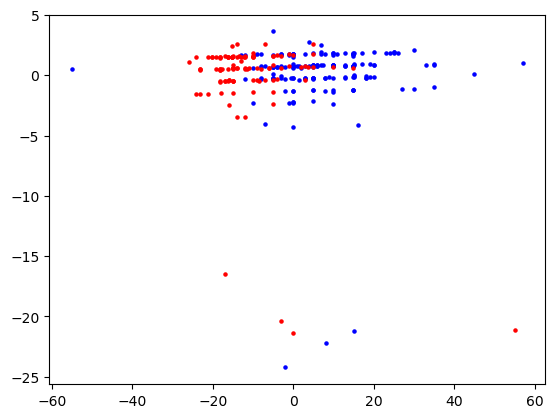

In [155]:
plt.scatter(list(x),list(y),c='b',s=5)
plt.scatter(list(x_f),list(y_f),c='r',s=5)
plt.show()

[[ 0.00383942  0.99985194  0.00493043  0.01603264]
 [ 0.02752492  0.00397237 -0.99822539  0.05265609]
 [ 0.06122298 -0.01648145  0.05418848  0.99651579]]
(3, 294)


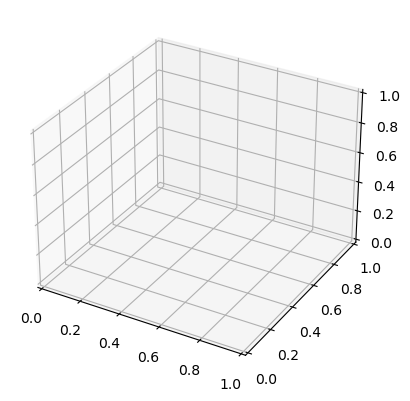

In [156]:



p3 = np.row_stack((eig_vecs[sorted_indices[3]],eig_vecs[sorted_indices[2]],eig_vecs[sorted_indices[1]]))


print(p3)

sub_dir_3=p3.dot(transposed_matrix)
print(sub_dir_3.shape)


sub_dir_3_t=np.transpose(sub_dir_3)
male_list=list()
female_list=list()
i=0
for row in sub_dir_3_t:
    if(df.at[i,'gender']==1):
        male_list.append(row.tolist())
    else:female_list.append(row.tolist())
    i=i+1

x=[x[0][0] for x in male_list]
y=[x[0][1] for x in male_list]
z=[x[0][2] for x in male_list]

# print(x)

x_f=[x[0][0] for x in female_list]
y_f=[x[0][1] for x in female_list]
z_f=[x[0][2] for x in female_list]



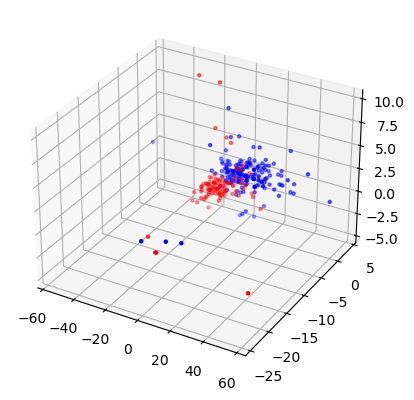

In [159]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(list(x), list(y), list(z), s=5, c='b')
ax.scatter(list(x_f), list(y_f), list(z_f), s=5, c='r')
plt.show()
